In [54]:
# importing to allow to read files into google colab directly from drive!

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# importing necessary libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
import keras
# Setting seed for reproducibility
np.random.seed(1234)  
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, LSTM,BatchNormalization,TimeDistributed,Flatten,Bidirectional

In [56]:
# the name of file names to read from txt files

filename = ['L4_abhay_M_38_10.txt','L4_abhilash1_M_23_10.txt','L4_amrish_M_29_10.txt','L4_annu1_F_10_10.txt','L4_anuj1_M_13_10.txt','L4_avinash1_M_27_10.txt','L4_bhuvan1_M_13_10.txt','L4_chachiiiiiiiiiii1_F_35_10.txt','L4_champu_M_21_10.txt','L4_garima1_F_13_10.txt','L4_geetamami1_F_34_10.txt','L4_gordhan_M_45_10.txt','L4_Gunjan1_F_17_10.txt','L4_guzzrAunty1_F_48_10.txt','L4_joney1_M_31_10.txt','L4_kanchan1_F_12_10.txt','L4_kapil_M_21_10.txt','L4_kirti1_F_6_10.txt','L4_kusum1_F_48_10.txt','L4_lalit1_M_12_10.txt','L4_laras1_M_8_10.txt','L4_mahesh1_M_50_10.txt','L4_mannu1_M_13_10.txt','L4_manthan1_M_18_10.txt','L4_mohit1_M_10_10.txt','L4_monika1_F_24_10.txt','L4_moolchnd1_M_47_10.txt','L4_munish_M_42_10.txt','L4_nanaji1_M_63_10.txt','L4_naveen1_M_15_10.txt','L4_neeraj_M_28_10.txt','L4_nirmal_M_49_10.txt','L4_nishu1_M_12_10.txt','L4_omsingh_M_35_10.txt','L4_pawan1_M_23_10.txt','L4_prabhat1_M_25_10.txt','L4_prachi1_F_8_10.txt','L4_praveen1_M_28_10.txt','L4_priya1_F_7_10.txt','L4_pushpa1_F_37_10.txt','L4_radhe1_M_36_10.txt','L4_rajumama1_M_36_10.txt','L4_raj_M_28_10.txt','L4_ranu_M_22_10.txt','L4_rohit1_M_16_10.txt','L4_sachinn_M_38_10.txt','L4_sakshi1_F_19_10.txt','L4_santosh1_F_53_10.txt','L4_shelly_F_17_10.txt','L4_soniya1_F_25_10.txt','L4_sumit1_M_12_10.txt','L4_sunil_M_27_10.txt','L4_sunyana1_F_15_10.txt','L4_sushma1_F_18_10.txt','L4_swati1_F_13_10.txt','L4_tarun1_M_18_10.txt','L4_umesh1_M_20_10.txt','L4_vikas1_M_33_10.txt','L4_vinay1_M_11_10.txt','L4_yogesh_M_28_10.txt']
len(filename)

60

In [57]:
FILE_PATH = '/content/drive/MyDrive/ell319_termpaper/Untitled Folder/'
# theta_age.csv, beta_age.csv, gamma_age.csv and alpha_age.csv
df=pd.read_csv(FILE_PATH+'beta_age.csv',header=None)
conditions = [
    (df[15] <= 10),
    (df[15] > 10) & (df[15] <= 15),
    (df[15] > 15) & (df[15] <= 23),
    (df[15] > 23) & (df[15] <= 29),
    (df[15] > 29) & (df[15] <= 38),
    (df[15] <= 90)]
choices = [1, 2, 3, 4, 5, 6]
df[16] = np.select(conditions, choices, default=0)
df = df.drop(15,axis=1)
print(df.shape)
print(df)

(632697, 16)
                          0       1        2       3       4         5   \
0        L1_abhay_M_38_1.txt  2.3714  80.9500  3.4591  5.1110 -0.033696   
1        L1_abhay_M_38_1.txt  2.5153  83.8110  3.5632  5.4921 -0.007509   
2        L1_abhay_M_38_1.txt  2.6574  86.5670  3.6620  5.8636  0.019180   
3        L1_abhay_M_38_1.txt  2.7973  89.2050  3.7553  6.2228  0.046265   
4        L1_abhay_M_38_1.txt  2.9342  91.7110  3.8422  6.5677  0.073672   
...                      ...     ...      ...     ...     ...       ...   
632692  L4_yogesh_M_28_9.txt  5.5722   7.1722 -6.5765  1.3987  0.024830   
632693  L4_yogesh_M_28_9.txt  5.9157   7.3742 -6.4364  1.6734  0.027916   
632694  L4_yogesh_M_28_9.txt  6.2507   7.4789 -6.2149  1.9458  0.033326   
632695  L4_yogesh_M_28_9.txt  6.5767   7.4923 -5.9167  2.2158  0.040833   
632696  L4_yogesh_M_28_9.txt  6.8925   7.4199 -5.5460  2.4836  0.050268   

             6        7        8        9         10        11      12  \
0      -0.42

In [60]:
data=np.array(df)
data = data[:80380,:]

In [59]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
data[:,1:15] = scl.fit_transform(data[:,1:15])

In [61]:

print(data.shape)
print(data)

(80380, 16)
[['L1_abhay_M_38_1.txt' 2.3714 80.95 ... -10.859 -0.1315 5]
 ['L1_abhay_M_38_1.txt' 2.5153 83.811 ... -11.373 -0.19861 5]
 ['L1_abhay_M_38_1.txt' 2.6574 86.567 ... -11.861 -0.2631 5]
 ...
 ['L1_nirmal_M_49_10.txt' -0.044836 -0.20045 ... 1.4498 -7.0804 6]
 ['L1_nirmal_M_49_10.txt' 0.043014 -0.10979 ... 1.6366 -7.1206 6]
 ['L1_nirmal_M_49_10.txt' 0.12467 -0.018982 ... 1.8144 -7.2766 6]]


In [62]:
# pick a large window size of 25 cycles
sequence_length = 50

# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    
    data_matrix = id_df[:,seq_cols]
    
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [63]:
sequence_cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

seq_gen = (list(gen_sequence(data[data[0:,0]==id], sequence_length, sequence_cols)) 
          for id in np.unique(data[0:,0]))

seq_array = np.concatenate(list(seq_gen))
print(seq_array.shape)
seq_array

(64780, 50, 15)


array([[[242.96, 615.14, 410.71, ..., 572.63, 418.78, 3],
        [253.1, 638.1, 428.09, ..., 593.28, 432.79, 3],
        [261.8, 657.5, 443.29, ..., 610.52, 444.24, 3],
        ...,
        [-82.405, -208.42, -146.71, ..., -252.05, -179.68, 3],
        [-87.993, -218.82, -161.76, ..., -260.44, -182.45, 3],
        [-93.691, -229.43, -176.99, ..., -268.81, -185.19, 3]],

       [[253.1, 638.1, 428.09, ..., 593.28, 432.79, 3],
        [261.8, 657.5, 443.29, ..., 610.52, 444.24, 3],
        [268.98, 673.14, 456.19, ..., 624.14, 452.98, 3],
        ...,
        [-87.993, -218.82, -161.76, ..., -260.44, -182.45, 3],
        [-93.691, -229.43, -176.99, ..., -268.81, -185.19, 3],
        [-99.406, -240.04, -192.22, ..., -276.96, -187.78, 3]],

       [[261.8, 657.5, 443.29, ..., 610.52, 444.24, 3],
        [268.98, 673.14, 456.19, ..., 624.14, 452.98, 3],
        [274.59, 684.92, 466.71, ..., 634.07, 458.96, 3],
        ...,
        [-93.691, -229.43, -176.99, ..., -268.81, -185.19, 3],
    

In [64]:
from sklearn.utils import shuffle
seq_array = shuffle(seq_array)

In [65]:
train_final=seq_array[0:60000,:,0:14]
test_final=seq_array[60000:,:,0:14]
from sklearn import preprocessing
train_label=seq_array[0:60000,0,14]
test_label=seq_array[60000:,0,14]
train_label=train_label.reshape((train_label.shape[0],1))
train_label=train_label.astype('int')
test_label=test_label.astype('int')
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)

(60000, 50, 14)
(60000, 1)
(4780, 50, 14)
(4780,)


In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_label)
train_label = encoder.transform(train_label)
test_label = encoder.transform(test_label)
# convert integers to dummy variables (i.e. one hot encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
from keras.utils import np_utils

train_label = np_utils.to_categorical(train_label)
# test_label = np_utils.to_categorical(test_label)

In [68]:
print(train_final.shape)
print(train_label.shape)
print(test_final.shape)
print(test_label.shape)
print(train_label)
print(np.unique(test_label))

(60000, 50, 14)
(60000, 6)
(4780, 50, 14)
(4780,)
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[0 1 2 3 4 5]


In [69]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [70]:
# creating our model:

nb_features = train_final.shape[2]
nb_out = train_label.shape[1]

model = Sequential()

model.add(Bidirectional(LSTM( units=256,
         return_sequences=True),
         input_shape=(sequence_length, nb_features),
        ))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(
         units=128,
         return_sequences=True))

model.add(BatchNormalization())
model.add(LSTM(
          units=64,
          return_sequences=False))

model.add(BatchNormalization())
model.add(Dense(units=32))
model.add(Dense(units=6, activation='softmax'))
tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 50, 512)          555008    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 50, 512)           0         
                                                                 
 batch_normalization_9 (Batc  (None, 50, 512)          2048      
 hNormalization)                                                 
                                                                 
 lstm_10 (LSTM)              (None, 50, 128)           328192    
                                                                 
 batch_normalization_10 (Bat  (None, 50, 128)          512       
 chNormalization)                                                
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
# fitting the model with training data

train_final = np.asarray(train_final).astype(np.float32)
test_final = np.asarray(test_final).astype(np.float32)
model.fit(train_final,train_label,validation_split=0.2,epochs=1, batch_size=32,verbose=1)

1500/1500 [==============================] - 148s 94ms/step - loss: 0.5100 - accuracy: 0.8212 - val_loss: 0.1717 - val_accuracy: 0.9411


In [72]:
# printing confusion matrix and calculating accuracy of our model

test_final = np.asarray(test_final).astype(np.float32)
y_pred_test = np.argmax(model.predict(test_final),axis=1)

y_true_test = test_label

cm_test = confusion_matrix(y_true_test, y_pred_test)
print(cm_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true_test, y_pred_test)))
print('Micro Precision: {:.2f}'.format(precision_score(y_true_test, y_pred_test, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true_test, y_pred_test, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true_test, y_pred_test, average='micro')))

[[ 571    5    4    0    0    2]
 [   4 1060   11    3    0    4]
 [   7   19  741    2    1   29]
 [   4   19   15  522    2    7]
 [   4   27   20    9  560   27]
 [   7   44    9    7    3 1031]]

Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94



In [73]:
# defining function to plot confusion matrix plot as shown below
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('confusion_matrix_gender_alpha.png',bbox_inches='tight')

Confusion matrix, without normalization
[[ 571    5    4    0    0    2]
 [   4 1060   11    3    0    4]
 [   7   19  741    2    1   29]
 [   4   19   15  522    2    7]
 [   4   27   20    9  560   27]
 [   7   44    9    7    3 1031]]


<Figure size 504x504 with 0 Axes>

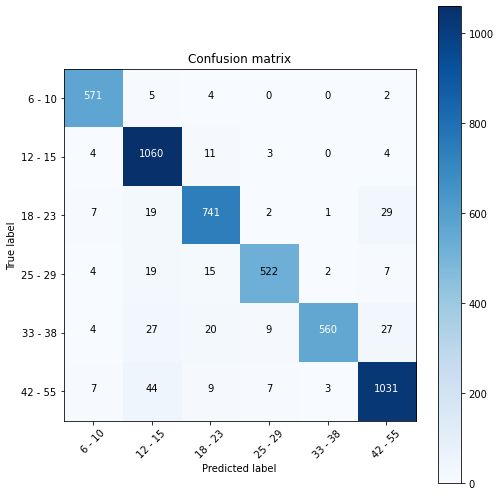

In [74]:
# Plot non-normalized confusion matrix
class_names=['6 - 10','12 - 15','18 - 23','25 - 29','33 - 38','42 - 55']
plt.figure()
plt.rcParams["figure.figsize"] = (7,7)
plot_confusion_matrix(cm_test, classes=class_names,
                      title='Confusion matrix')
plt.show()